In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost shap openpyxl

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [7]:
import pandas as pd

# Load the data (from your Excel file)
df = pd.read_excel("BankOfAmerica_LoanDefault_RiskAnalysis.xlsx")

# Quick preview
print(df.head())

   Customer ID  Age  Gender Marital Status  Income  Loan Amount  Loan Term  \
0         1001   35    Male       Married    65000        25000         60   
1         1002   52  Female         Single   40000        12000         36   
2         1003   29    Male         Single   72000        28000         48   
3         1004   44  Female       Divorced   50000        15000         24   
4         1005   31    Male       Married    85000        32000         60   

   Credit History Employment Status Loan Purpose  Default  
0               1         Full-Time     Car Loan        0  
1               0         Part-Time     Personal        1  
2               1         Full-Time         Home        1  
3               0     Self-Employed     Business        0  
4               1         Full-Time     Car Loan        0  


In [5]:
# Drop rows with missing values
df.dropna(inplace=True)

In [12]:
# Convert categorical variables to numerical (label encoding or one-hot encoding)
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Gender', 'Marital Status', 'Employment Status', 'Loan Purpose', 'Credit History', 'Loan Term', 'Income']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [15]:
# Define features (X) and target (y)
X = df.drop(['Customer ID', 'Default'], axis=1)
y = df['Default']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [18]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

In [19]:
print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("AUC Score:", roc_auc_score(y_test, model_lr.predict_proba(X_test)[:, 1]))

Logistic Regression Results:
[[1 1]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

AUC Score: 1.0


In [20]:
import xgboost as xgb

In [21]:
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

C:\Users\Aayush\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [09:31:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [22]:
print("XGBoost Results:")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("AUC Score:", roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:, 1]))

XGBoost Results:
[[0 2]
 [1 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      0.50      0.40         2

    accuracy                           0.25         4
   macro avg       0.17      0.25      0.20         4
weighted avg       0.17      0.25      0.20         4

AUC Score: 0.5


In [23]:
import shap

In [24]:
explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X_test)

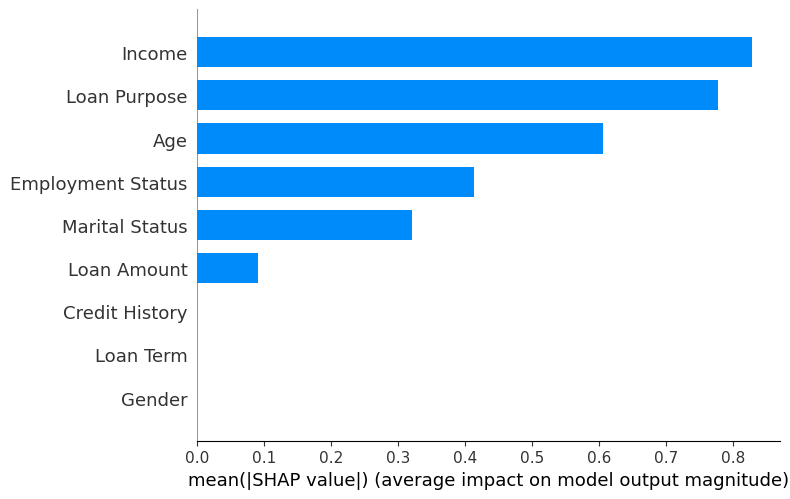

In [25]:
# Summary plot (feature importance)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [26]:
X_test['Predicted_Default_Prob'] = model_xgb.predict_proba(X_test)[:, 1]
X_test['Actual'] = y_test.values
X_test.to_csv("loan_default_predictions.csv", index=False)